### libraries

In [31]:
import pandas as pd
import numpy as np
from pandas import json_normalize
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import json
import scipy.stats as stats


### read csv to dataframe

In [32]:
df = pd.read_csv (r'tracks_file.csv',sep='\t')

FileNotFoundError: [Errno 2] No such file or directory: 'tracks_file.csv'

_________________

### Histogram: created_at

In [33]:
df['created_at'] = pd.to_datetime(df['created_at']) # convert string data to datetime object
df['created_at']

0       2012-04-17 18:17:00+00:00
1       2016-04-02 11:44:00+00:00
2       2021-11-07 00:02:22+00:00
3       2021-10-31 16:09:15+00:00
4       2020-10-29 11:18:07+00:00
                   ...           
13667   2013-12-30 11:36:04+00:00
13668   2013-11-05 06:20:32+00:00
13669   2016-05-16 11:44:23+00:00
13670   2013-11-09 09:47:59+00:00
13671   2014-02-28 13:32:54+00:00
Name: created_at, Length: 13672, dtype: datetime64[ns, UTC]

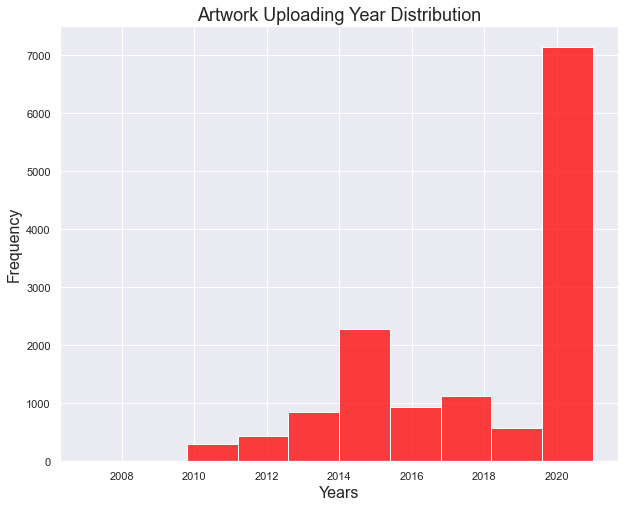

<Figure size 720x576 with 0 Axes>

In [34]:
sns.set(style="darkgrid")
sns.histplot(data=df['created_at'].dt.year, kde=False, color='red', bins=10)
sns.set(rc={'figure.figsize':(10,8)})
plt.title('Artwork Uploading Year Distribution', fontsize=18)
plt.xlabel('Years', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.show()
plt.clf()

### Scatter: duration Vs. playback_count

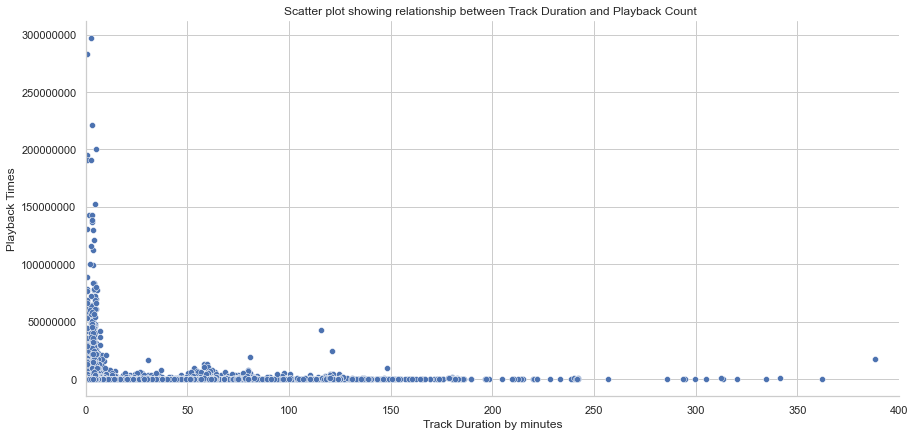

<Figure size 720x576 with 0 Axes>

In [35]:
# fig = plt.figure()
sns.set(style='whitegrid')
ax = sns.relplot(x=df['duration'] / 1000/ 60, y=df['playback_count'], kind='scatter',
            height=6, aspect=2)
ax.set(xlim=(0, 400)) # adjust this line or comment this line
plt.xlabel('Track Duration by minutes')
plt.ylabel('Playback Times')
plt.title('Scatter plot showing relationship between Track Duration and Playback Count ')
plt.ticklabel_format(style='plain', axis='y')
# fig.subplots_adjust(right=2.000,bottom=-1.000)
plt.show()
plt.clf()

### Distplot: Duration

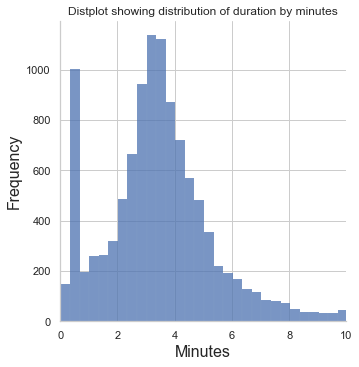

<Figure size 720x576 with 0 Axes>

In [36]:
ax = sns.displot(x=df['duration'] / 1000 / 60)
ax.set(xlim=(0, 10)) # adjust this value
sns.set(style="darkgrid")
plt.ticklabel_format(style='plain', axis='x')
plt.xlabel('Minutes', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.title('Distplot showing distribution of duration by minutes')
plt.show()
plt.clf()


### jointplot: Like and repost of a track

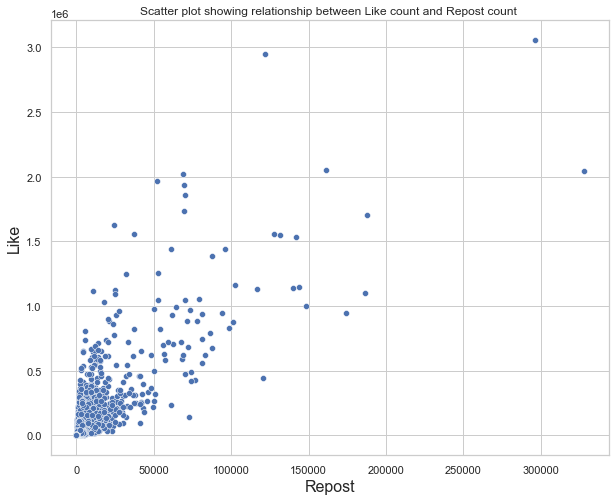

<Figure size 720x576 with 0 Axes>

In [37]:
sns.set(style='whitegrid')
ax = sns.scatterplot(x=df['reposts_count'], y=df['likes_count']) 

plt.xlabel('Repost', fontsize=16)
plt.ylabel('Like', fontsize=16)
plt.title('Scatter plot showing relationship between Like count and Repost count ')
plt.show()
plt.clf()


### Boxplot: playback, comment, like, repost

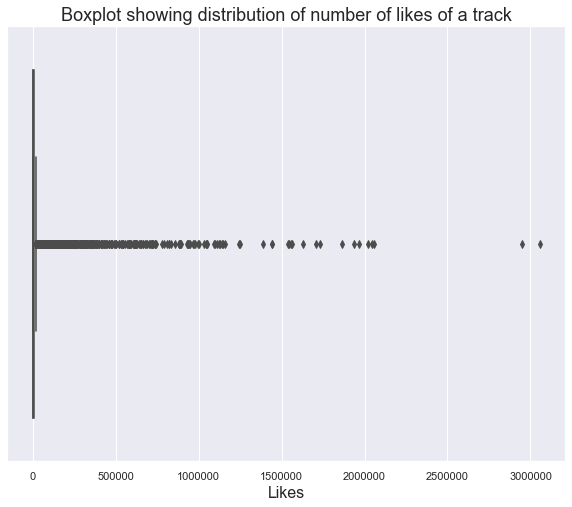

<Figure size 720x576 with 0 Axes>

In [52]:
ax = sns.boxplot(x=df['likes_count'])
#ax.set(xlim=(0, 100)) # adjust this value
sns.set(style="darkgrid")
plt.ticklabel_format(style='plain', axis='x')
plt.xlabel('Likes', fontsize=16)
plt.title('Boxplot showing distribution of number of likes of a track', fontsize=18)
plt.show()
plt.clf()

### Correlation matrix: comment, duration, like, repost, download, playback

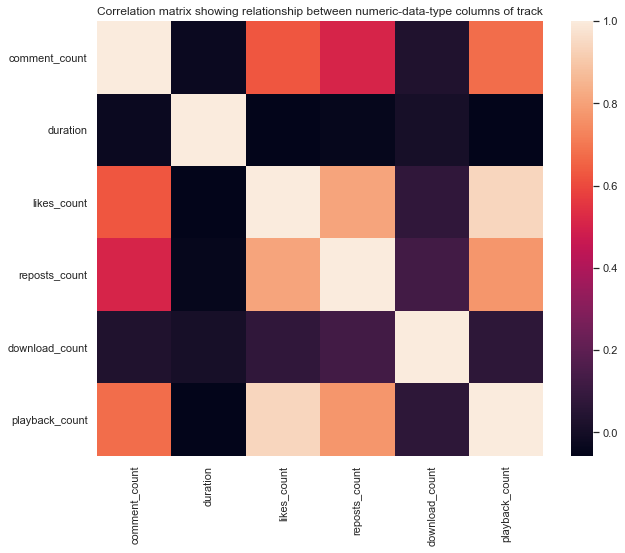

In [39]:
df1 = df[['comment_count','duration','likes_count','reposts_count','download_count','playback_count']]
sns.heatmap(df1.corr())
plt.title('Correlation matrix showing relationship between numeric-data-type columns of track');

### Jointplot: duration vs. likes_count

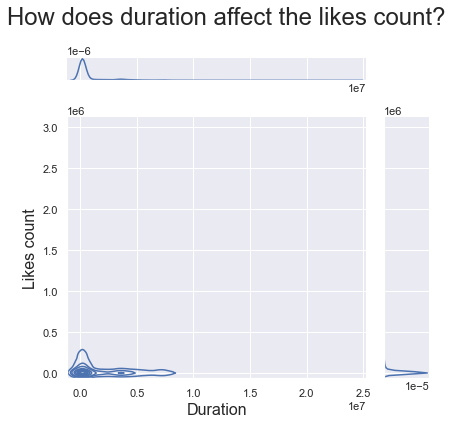

In [40]:
# Plot the jointplot
sns.set_style('darkgrid');
p = sns.jointplot(x='duration',y='likes_count',data=df,kind='kde')

# JointGrid has a convenience function
p.set_axis_labels('Duration', 'Likes count', fontsize=16)
  
# Set title for plot
p.fig.suptitle( "How does duration affect the likes count?" , size = 24 )
  
# Display figure
plt.tight_layout()

*Câu hỏi: 

*Chuẩn bị dữ liệu: Các trường dữ liệu cần thiết:


*Biểu đồ: 

*Dự đoán: 

*Kết quả:

### KDEplot: Distribution of music genres year by year

In [ ]:
df['genre'].value_counts()

Trên đây là tần xuất xuất hiện của các giá trị trong cột `genre`. Người dùng được phép tự do đặt tên thể loại cho 1 bài hát, điều này dẫn đến sự không đồng nhất của trường dữ liệu `genre`. Vì vậy ta chọn 5 giá trị xuất hiện nhiều nhất của trường `genre` để trực quan hóa

In [ ]:
subsetDataFrame = df[df['genre'].isin(['Pop','Country','Hip-hop & Rap','Dance & EDM','Electronic'])]
subsetDataFrame['created_at'] = pd.to_datetime(subsetDataFrame['created_at']) # convert string data to datetime object
ax = sns.kdeplot(data=subsetDataFrame, x=subsetDataFrame['created_at'].dt.year, hue="genre", multiple="stack")
ax.set_title("Distribution of 5 music genres year by year",size = 20);

*Câu hỏi: 

*Chuẩn bị dữ liệu: Các trường dữ liệu cần thiết:


*Biểu đồ: 

*Dự đoán: 

*Kết quả: